# Регрессия на доходность первого дня

### Импорты

In [1]:
import numpy as np
import pandas as pd

from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from scipy.stats import spearmanr, pearsonr, kendalltau

import shap

import warnings
warnings.filterwarnings("ignore")

### Датафрейм

In [2]:
path = '../../../data/final/pairs.csv'

data = pd.read_csv(path, index_col = 0)
data.head(3)

,views,forwards,thumb_up_react_cnt,thumb_down_react_cnt,mindblowing_react_cnt,heart_react_cnt,thinking_react_cnt,crying_react_cnt,fire_react_cnt,clap_react_cnt,...,free_bird_react_cnt_x_positive_div_by_days,snowman_react_cnt_x_positive_div_by_days,banana_react_cnt_x_positive_div_by_days,poop_react_cnt_x_positive_div_by_days,rofl_smile_react_cnt_x_positive_div_by_days,clown_smile_react_cnt_x_positive_div_by_days,devil_smile_react_cnt_x_positive_div_by_days,hundred_react_cnt_x_positive_div_by_days,head_arm_smile_react_cnt_x_positive_div_by_days,eyes_react_cnt_x_positive_div_by_days
0,63078,63,251,19,0,27,36,0,2,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,63078,63,251,19,0,27,36,0,2,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,63078,63,251,19,0,27,36,0,2,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [3]:
cols = ['views',
 'forwards',
 'thumb_up_react_cnt',
 'thumb_down_react_cnt',
 'mindblowing_react_cnt',
 'heart_react_cnt',
 'thinking_react_cnt',
 'crying_react_cnt',
 'fire_react_cnt',
 'clap_react_cnt',
 'whale_react_cnt',
 'champaign_react_cnt',
 'heart_fire_react_cnt',
 'okay_react_cnt',
 'smile_stars_react_cnt',
 'smiling_react_cnt',
 'cheers_react_cnt',
 'lovely_smile_react_cnt',
 'drunk_smile_react_cnt',
 'angry_smile_react_cnt',
 'shicked_smile_react_cnt',
 'moos_smile_react_cnt',
 'hotdog_react_cnt',
 'free_bird_react_cnt',
 'snowman_react_cnt',
 'banana_react_cnt',
 'poop_react_cnt',
 'rofl_smile_react_cnt',
 'clown_smile_react_cnt',
 'devil_smile_react_cnt',
 'hundred_react_cnt',
 'head_arm_smile_react_cnt',
 'eyes_react_cnt',
 'days_before_ipo',
 'text_len',
 'price',
 'delta_price',
 'delta_perc',
 'open',
 'delta_open',
 'delta_perc_on_ipo_date',
 'positive_score',
 'views_x_positive',
 'forwards_x_positive',
 'thumb_up_react_cnt_x_positive',
 'thumb_down_react_cnt_x_positive',
 'mindblowing_react_cnt_x_positive',
 'heart_react_cnt_x_positive',
 'thinking_react_cnt_x_positive',
 'crying_react_cnt_x_positive',
 'fire_react_cnt_x_positive',
 'clap_react_cnt_x_positive',
 'whale_react_cnt_x_positive',
 'champaign_react_cnt_x_positive',
 'heart_fire_react_cnt_x_positive',
 'okay_react_cnt_x_positive',
 'smile_stars_react_cnt_x_positive',
 'smiling_react_cnt_x_positive',
 'cheers_react_cnt_x_positive',
 'lovely_smile_react_cnt_x_positive',
 'drunk_smile_react_cnt_x_positive',
 'angry_smile_react_cnt_x_positive',
 'shicked_smile_react_cnt_x_positive',
 'moos_smile_react_cnt_x_positive',
 'hotdog_react_cnt_x_positive',
 'free_bird_react_cnt_x_positive',
 'snowman_react_cnt_x_positive',
 'banana_react_cnt_x_positive',
 'poop_react_cnt_x_positive',
 'rofl_smile_react_cnt_x_positive',
 'clown_smile_react_cnt_x_positive',
 'devil_smile_react_cnt_x_positive',
 'hundred_react_cnt_x_positive',
 'head_arm_smile_react_cnt_x_positive',
 'eyes_react_cnt_x_positive',
 'views_div_by_days',
 'forwards_div_by_days',
 'thumb_up_react_cnt_div_by_days',
 'thumb_down_react_cnt_div_by_days',
 'mindblowing_react_cnt_div_by_days',
 'heart_react_cnt_div_by_days',
 'thinking_react_cnt_div_by_days',
 'crying_react_cnt_div_by_days',
 'fire_react_cnt_div_by_days',
 'clap_react_cnt_div_by_days',
 'whale_react_cnt_div_by_days',
 'champaign_react_cnt_div_by_days',
 'heart_fire_react_cnt_div_by_days',
 'okay_react_cnt_div_by_days',
 'smile_stars_react_cnt_div_by_days',
 'smiling_react_cnt_div_by_days',
 'cheers_react_cnt_div_by_days',
 'lovely_smile_react_cnt_div_by_days',
 'drunk_smile_react_cnt_div_by_days',
 'angry_smile_react_cnt_div_by_days',
 'shicked_smile_react_cnt_div_by_days',
 'moos_smile_react_cnt_div_by_days',
 'hotdog_react_cnt_div_by_days',
 'free_bird_react_cnt_div_by_days',
 'snowman_react_cnt_div_by_days',
 'banana_react_cnt_div_by_days',
 'poop_react_cnt_div_by_days',
 'rofl_smile_react_cnt_div_by_days',
 'clown_smile_react_cnt_div_by_days',
 'devil_smile_react_cnt_div_by_days',
 'hundred_react_cnt_div_by_days',
 'head_arm_smile_react_cnt_div_by_days',
 'eyes_react_cnt_div_by_days',
 'text_len_div_by_days',
 'positive_score_div_by_days',
 'views_x_positive_div_by_days',
 'forwards_x_positive_div_by_days',
 'thumb_up_react_cnt_x_positive_div_by_days',
 'thumb_down_react_cnt_x_positive_div_by_days',
 'mindblowing_react_cnt_x_positive_div_by_days',
 'heart_react_cnt_x_positive_div_by_days',
 'thinking_react_cnt_x_positive_div_by_days',
 'crying_react_cnt_x_positive_div_by_days',
 'fire_react_cnt_x_positive_div_by_days',
 'clap_react_cnt_x_positive_div_by_days',
 'whale_react_cnt_x_positive_div_by_days',
 'champaign_react_cnt_x_positive_div_by_days',
 'heart_fire_react_cnt_x_positive_div_by_days',
 'okay_react_cnt_x_positive_div_by_days',
 'smile_stars_react_cnt_x_positive_div_by_days',
 'smiling_react_cnt_x_positive_div_by_days',
 'cheers_react_cnt_x_positive_div_by_days',
 'lovely_smile_react_cnt_x_positive_div_by_days',
 'drunk_smile_react_cnt_x_positive_div_by_days',
 'angry_smile_react_cnt_x_positive_div_by_days',
 'shicked_smile_react_cnt_x_positive_div_by_days',
 'moos_smile_react_cnt_x_positive_div_by_days',
 'hotdog_react_cnt_x_positive_div_by_days',
 'free_bird_react_cnt_x_positive_div_by_days',
 'snowman_react_cnt_x_positive_div_by_days',
 'banana_react_cnt_x_positive_div_by_days',
 'poop_react_cnt_x_positive_div_by_days',
 'rofl_smile_react_cnt_x_positive_div_by_days',
 'clown_smile_react_cnt_x_positive_div_by_days',
 'devil_smile_react_cnt_x_positive_div_by_days',
 'hundred_react_cnt_x_positive_div_by_days',
 'head_arm_smile_react_cnt_x_positive_div_by_days',
 'eyes_react_cnt_x_positive_div_by_days']

target = '1d_price'

In [4]:
X = data[cols]
y = data[target]

### Results collection

In [5]:
results = pd.DataFrame(columns = ['MAPE', 'Spearman', 'Pearson', 'Kendall'])

### Baseline model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [7]:
model = LGBMRegressor()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [8]:
# mape
mape_train = round(mean_absolute_error(y_train, y_pred_train), 4)
mape_test = round(mean_absolute_error(y_test, y_pred_test), 4)

# spearman
spear_train = round(spearmanr(y_train, y_pred_train)[0], 4)
spear_test = round(spearmanr(y_test, y_pred_test)[0], 4)

# pearson
pears_train = round(pearsonr(y_train, y_pred_train)[0], 4)
pears_test = round(pearsonr(y_test, y_pred_test)[0], 4)

# kendaltau
kendall_train = round(kendalltau(y_train, y_pred_train)[0], 4)
kendall_test = round(kendalltau(y_test, y_pred_test)[0], 4)

cur_res = {'MAPE' : mape_train,
          'Spearman' : spear_train,
          'Pearson' : pears_train,
          'Kendall' : kendall_train}

results = results.append(pd.Series(cur_res,  name = 'baseline_train'))

cur_res = {'MAPE' : mape_test,
          'Spearman' : spear_test,
          'Pearson' : pears_test,
          'Kendall' : kendall_test}

results = results.append(pd.Series(cur_res,  name = 'baseline_test'))
results

,MAPE,Spearman,Pearson,Kendall
baseline_train,0.0266,0.5203,0.8568,0.4046
baseline_test,0.0297,0.4942,0.7764,0.3827


### Feature selection

1. Null drop
2. Nonsense drop
3. Correlation drop
4. Forward selection drop

In [9]:
import sys
sys.path.insert(1, '../../pipeline')

import pipeline as pl

In [10]:
cols = X_train.columns
print(f'{len(cols)} features before pipeline')

143 features before pipeline


### Null drop

In [11]:
cols = pl.null_drop(X, cutoff = 0.5)
print(f'{len(cols)} features remain')

143 features remain


### Nonsense drop

In [12]:
cols = pl.nonsense_drop(X[cols], 0.9)
print(f'{len(cols)} features remain')

47 features remain


In [13]:
model = LGBMRegressor()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

In [14]:
# mape
mape_train = round(mean_absolute_error(y_train, y_pred_train), 4)
mape_test = round(mean_absolute_error(y_test, y_pred_test), 4)

# spearman
spear_train = round(spearmanr(y_train, y_pred_train)[0], 4)
spear_test = round(spearmanr(y_test, y_pred_test)[0], 4)

# pearson
pears_train = round(pearsonr(y_train, y_pred_train)[0], 4)
pears_test = round(pearsonr(y_test, y_pred_test)[0], 4)

# kendaltau
pears_train = round(pearsonr(y_train, y_pred_train)[0], 4)
pears_test = round(pearsonr(y_test, y_pred_test)[0], 4)

cur_res = {'MAPE' : mape_train,
          'Spearman' : spear_train,
          'Pearson' : pears_train,
          'Kendall' : kendall_train}

results = results.append(pd.Series(cur_res,  name = 'after_nonsense_drop_train'))

cur_res = {'MAPE' : mape_test,
          'Spearman' : spear_test,
          'Pearson' : pears_test,
          'Kendall' : kendall_test}

results = results.append(pd.Series(cur_res,  name = 'after_nonsense_drop_test'))
results

,MAPE,Spearman,Pearson,Kendall
baseline_train,0.0266,0.5203,0.8568,0.4046
baseline_test,0.0297,0.4942,0.7764,0.3827
after_nonsense_drop_train,0.0261,0.5411,0.8594,0.4046
after_nonsense_drop_test,0.0291,0.5131,0.7800,0.3827


### Сorrelation drop

In [15]:
cols = pl.corr_drop(X[cols], y,  0.5)
print(f'{len(cols)} features remain')

price (0.0509) was removed by open (0.0526)
delta_perc (0.0081) was removed by delta_price (0.0112)
delta_perc_on_ipo_date (0.0081) was removed by delta_price (0.0112)
forwards_x_positive (0.0043) was removed by views_x_positive (0.0062)
thumb_up_react_cnt_x_positive (0.0036) was removed by views_x_positive (0.0062)
views_div_by_days (0.1483) was removed by forwards_div_by_days (0.1602)
forwards_div_by_days (0.1602) was removed by thumb_up_react_cnt_div_by_days (0.183)
heart_react_cnt_div_by_days (0.12) was removed by thumb_up_react_cnt_div_by_days (0.183)
thinking_react_cnt_div_by_days (0.1091) was removed by thumb_up_react_cnt_div_by_days (0.183)
thumb_up_react_cnt_div_by_days (0.183) was removed by text_len_div_by_days (0.2116)
crying_react_cnt_x_positive_div_by_days (0.018) was removed by crying_react_cnt_div_by_days (0.0346)
fire_react_cnt_x_positive_div_by_days (0.0401) was removed by fire_react_cnt_div_by_days (0.1243)
smiling_react_cnt_x_positive_div_by_days (0.0297) was remove

In [16]:
model = LGBMRegressor()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

In [17]:
# mape
mape_train = round(mean_absolute_error(y_train, y_pred_train), 4)
mape_test = round(mean_absolute_error(y_test, y_pred_test), 4)

# spearman
spear_train = round(spearmanr(y_train, y_pred_train)[0], 4)
spear_test = round(spearmanr(y_test, y_pred_test)[0], 4)

# pearson
pears_train = round(pearsonr(y_train, y_pred_train)[0], 4)
pears_test = round(pearsonr(y_test, y_pred_test)[0], 4)

# kendaltau
pears_train = round(pearsonr(y_train, y_pred_train)[0], 4)
pears_test = round(pearsonr(y_test, y_pred_test)[0], 4)

cur_res = {'MAPE' : mape_train,
          'Spearman' : spear_train,
          'Pearson' : pears_train,
          'Kendall' : kendall_train}

results = results.append(pd.Series(cur_res,  name = 'after_correlation_drop_train'))

cur_res = {'MAPE' : mape_test,
          'Spearman' : spear_test,
          'Pearson' : pears_test,
          'Kendall' : kendall_test}

results = results.append(pd.Series(cur_res,  name = 'after_correlation_drop_test'))
results

,MAPE,Spearman,Pearson,Kendall
baseline_train,0.0266,0.5203,0.8568,0.4046
baseline_test,0.0297,0.4942,0.7764,0.3827
after_nonsense_drop_train,0.0261,0.5411,0.8594,0.4046
after_nonsense_drop_test,0.0291,0.5131,0.7800,0.3827
after_correlation_drop_train,0.0268,0.5228,0.8523,0.4046
after_correlation_drop_test,0.0298,0.4913,0.7677,0.3827


### Forward selection

In [18]:
train_df = X_train
train_df['target'] = y_train
model = LGBMRegressor

In [19]:
cols = pl.forward_selection_regression(train_df, cols, model, target='target', alpha_in=0.05)

В модель была добавлена переменная heart_react_cnt_x_positive_div_by_days, p-value: 0.0
В модель была добавлена переменная delta_price, p-value: 0.0
В модель была добавлена переменная fire_react_cnt_div_by_days, p-value: 0.0
В модель была добавлена переменная views, p-value: 0.0
В модель была добавлена переменная heart_react_cnt_x_positive, p-value: 0.0
В модель была добавлена переменная smiling_react_cnt_div_by_days, p-value: 0.0
В модель была добавлена переменная open, p-value: 0.0
В модель была добавлена переменная crying_react_cnt_div_by_days, p-value: 0.0
В модель была добавлена переменная crying_react_cnt, p-value: 0.0
В модель была добавлена переменная thinking_react_cnt_x_positive_div_by_days, p-value: 0.0
В модель была добавлена переменная thinking_react_cnt_x_positive, p-value: 0.0
В модель была добавлена переменная fire_react_cnt_x_positive, p-value: 0.0
В модель была добавлена переменная thinking_react_cnt, p-value: 0.0
В модель была добавлена переменная fire_react_cnt, p-v

### Итоговые переменные

In [20]:
print(f'total params:{len(cols)}')
cols

total params:22


['heart_react_cnt_x_positive_div_by_days',
 'delta_price',
 'fire_react_cnt_div_by_days',
 'views',
 'heart_react_cnt_x_positive',
 'smiling_react_cnt_div_by_days',
 'open',
 'crying_react_cnt_div_by_days',
 'crying_react_cnt',
 'thinking_react_cnt_x_positive_div_by_days',
 'thinking_react_cnt_x_positive',
 'fire_react_cnt_x_positive',
 'thinking_react_cnt',
 'fire_react_cnt',
 'smiling_react_cnt',
 'text_len_div_by_days',
 'positive_score',
 'forwards',
 'days_before_ipo',
 'views_x_positive',
 'delta_open',
 'thumb_up_react_cnt']

### Model

In [21]:
model = LGBMRegressor()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

In [22]:
# mape
mape_train = round(mean_absolute_error(y_train, y_pred_train), 4)
mape_test = round(mean_absolute_error(y_test, y_pred_test), 4)

# spearman
spear_train = round(spearmanr(y_train, y_pred_train)[0], 4)
spear_test = round(spearmanr(y_test, y_pred_test)[0], 4)

# pearson
pears_train = round(pearsonr(y_train, y_pred_train)[0], 4)
pears_test = round(pearsonr(y_test, y_pred_test)[0], 4)

# kendaltau
pears_train = round(pearsonr(y_train, y_pred_train)[0], 4)
pears_test = round(pearsonr(y_test, y_pred_test)[0], 4)

cur_res = {'MAPE' : mape_train,
          'Spearman' : spear_train,
          'Pearson' : pears_train,
          'Kendall' : kendall_train}

results = results.append(pd.Series(cur_res,  name = 'model_train'))

cur_res = {'MAPE' : mape_test,
          'Spearman' : spear_test,
          'Pearson' : pears_test,
          'Kendall' : kendall_test}

results = results.append(pd.Series(cur_res,  name = 'model_test'))
results

,MAPE,Spearman,Pearson,Kendall
baseline_train,0.0266,0.5203,0.8568,0.4046
baseline_test,0.0297,0.4942,0.7764,0.3827
after_nonsense_drop_train,0.0261,0.5411,0.8594,0.4046
after_nonsense_drop_test,0.0291,0.5131,0.7800,0.3827
after_correlation_drop_train,0.0268,0.5228,0.8523,0.4046
after_correlation_drop_test,0.0298,0.4913,0.7677,0.3827
model_train,0.0262,0.5232,0.8568,0.4046
model_test,0.0290,0.4966,0.7800,0.3827


In [23]:
results.to_csv('results/1d_boosting.csv')

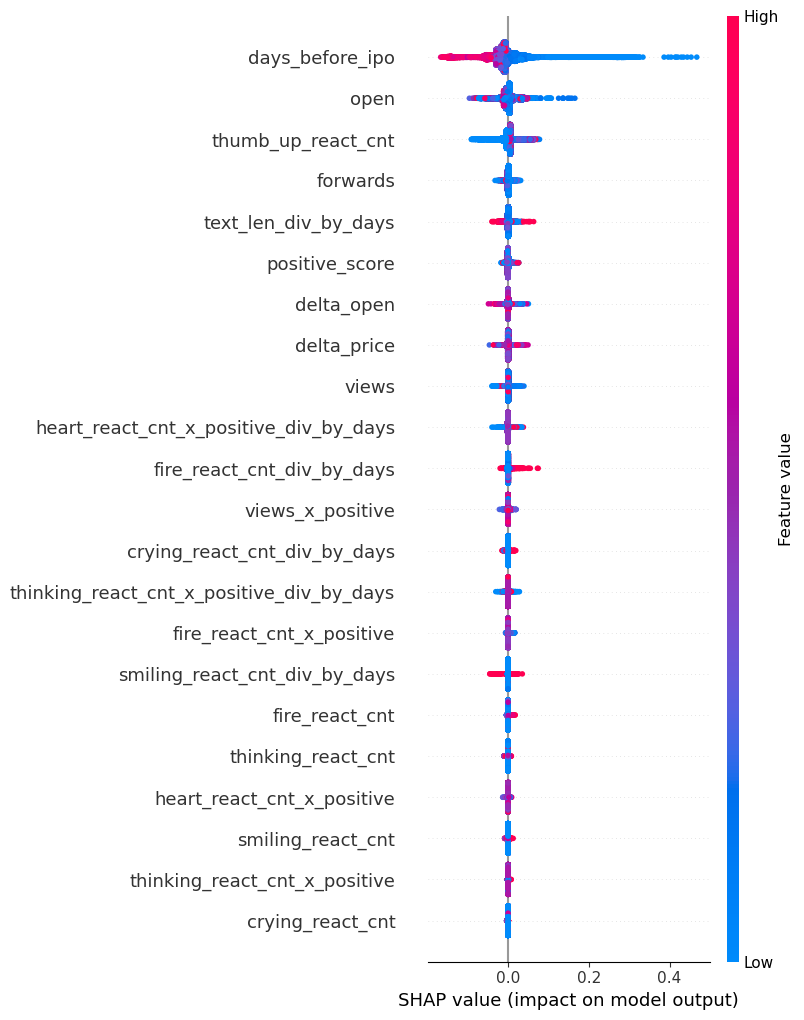

In [24]:
shap_test = shap.TreeExplainer(model).shap_values(X_train[cols])
shap.summary_plot(shap_test, X_train[cols],
                      max_display=25, auto_size_plot=True)